In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
bank = pd.read_csv("BankNote_Authentication.csv")

In [9]:
bank.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [10]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [11]:
bank.describe

<bound method NDFrame.describe of       variance  skewness   curtosis   entropy  class
0     3.621600   8.66610  -2.807300 -0.446990      0
1     4.545900   8.16740  -2.458600 -1.462100      0
2     3.866000  -2.63830   1.924200  0.106450      0
3     3.456600   9.52280  -4.011200 -3.594400      0
4     0.329240  -4.45520   4.571800 -0.988800      0
5     4.368400   9.67180  -3.960600 -3.162500      0
6     3.591200   3.01290   0.728880  0.564210      0
7     2.092200  -6.81000   8.463600 -0.602160      0
8     3.203200   5.75880  -0.753450 -0.612510      0
9     1.535600   9.17720  -2.271800 -0.735350      0
10    1.224700   8.77790  -2.213500 -0.806470      0
11    3.989900  -2.70660   2.394600  0.862910      0
12    1.899300   7.66250   0.153940 -3.110800      0
13   -1.576800  10.84300   2.546200 -2.936200      0
14    3.404000   8.72610  -2.991500 -0.572420      0
15    4.676500  -3.38950   3.489600  1.477100      0
16    2.671900   3.06460   0.371580  0.586190      0
17    0.8035

In [12]:
bank.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


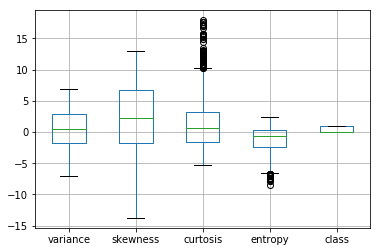

In [13]:
bank.boxplot()

In [14]:
from sklearn.model_selection import train_test_split

In [29]:
cols = ['variance','skewness','curtosis','entropy']
X = bank[cols]
y = bank["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [30]:
print(y_test)

430     0
588     0
296     0
184     0
244     0
590     0
78      0
708     0
411     0
43      0
1033    1
1176    1
233     0
893     1
322     0
796     1
839     1
1090    1
887     1
936     1
67      0
331     0
1083    1
551     0
990     1
700     0
289     0
771     1
597     0
432     0
       ..
649     0
1119    1
579     0
227     0
598     0
680     0
1131    1
985     1
66      0
1133    1
1009    1
211     0
983     1
731     0
994     1
1222    1
976     1
1232    1
1343    1
767     1
1237    1
1233    1
874     1
1280    1
1191    1
273     0
906     1
362     0
2       0
6       0
Name: class, Length: 549, dtype: int64


In [31]:
X_train.describe()

,variance,skewness,curtosis,entropy
count,823.000000,823.000000,823.000000,823.000000
mean,0.390257,1.837494,1.478195,-1.201028
std,2.830005,5.904726,4.280001,2.094911
min,-7.036400,-13.773100,-5.261300,-8.548200
25%,-1.770500,-2.082750,-1.370400,-2.375650
50%,0.379840,2.410700,0.661190,-0.612510
75%,2.767600,6.627900,3.252700,0.400630
max,6.824800,12.951600,17.927400,2.162500


In [33]:
from sklearn.tree import DecisionTreeClassifier
Bclf = DecisionTreeClassifier()
Bclf.fit(X_train,y_train);
predictions = Bclf.predict(X_test)

## Now Evaluating the model

In [37]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[301   2]
 [  8 238]]
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       303
          1       0.99      0.97      0.98       246

avg / total       0.98      0.98      0.98       549

